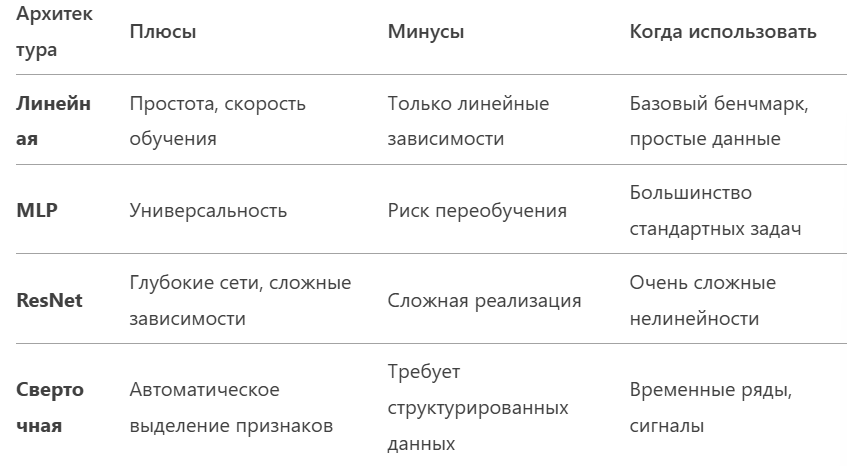

Для каждой модели можно добавить:

Dropout для регуляризации

BatchNorm для стабилизации обучения

Различные активационные функции (LeakyReLU, SELU и т.д.)

In [2]:
import torch
import torch.nn as nn

1. Линейная регрессия (самая простая)

Простейшая модель без скрытых слоев

Может обучаться очень быстро

Подходит только для линейных зависимостей

Плохо работает с сложными данными

In [3]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)  # Один полносвязный слой
    
    def forward(self, x):
        return self.linear(x)

2. Многослойный перцептрон (MLP)

2 скрытых слоя с активацией ReLU

Может улавливать нелинейные зависимости

Универсальная архитектура для большинства задач

Риск переобучения на маленьких датасетах

In [4]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.net(x)

3. Резидуальная сеть (ResNet-like)

Residual connections помогают при обучении глубоких сетей

Решает проблему исчезающих градиентов

Хорошо работает для очень сложных зависимостей

Требует больше данных для обучения

In [5]:
class ResNetRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        residual = x
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        # Добавляем residual connection
        if x.shape == residual.shape:  # Проверка размерности
            x = x + residual
        return self.fc3(x)

4. Сверточная сеть (для структурных данных)

Использует 1D свертки для анализа локальных зависимостей

Хорошо работает, когда признаки имеют пространственную структуру

Автоматически выделяет локальные паттерны

Требует большего количества параметров

In [6]:
class ConvRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        # Предполагаем, что входные данные можно reshape в 2D
        self.conv_net = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        # Вычисляем размер выхода сверточной части
        conv_out_size = self._get_conv_out(input_dim)
        self.fc = nn.Linear(conv_out_size, 1)
        
    def _get_conv_out(self, input_dim):
        dummy = torch.zeros(1, 1, input_dim)
        return len(self.conv_net(dummy).flatten())
    
    def forward(self, x):
        # Добавляем размерность канала (1D свертка)
        x = x.unsqueeze(1)  # [batch, 1, features]
        x = self.conv_net(x)
        return self.fc(x)